#### Introdução ao Aprendizado Supervisionado

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error

In [3]:
df = pd.DataFrame({
    "A": 3,
    "B": pd.Timestamp('20240101'),
    "C": pd.Series(2, index=list(range(4)), dtype='float32'),
    "D": np.array([5] * 4, dtype='int32'),
    "E": pd.Categorical(["train", "test", "test", "train"]),
    "F": "foo"
})

In [4]:
df

,A,B,C,D,E,F
0,3,2024-01-01,2.0,5,train,foo
1,3,2024-01-01,2.0,5,test,foo
2,3,2024-01-01,2.0,5,test,foo
3,3,2024-01-01,2.0,5,train,foo


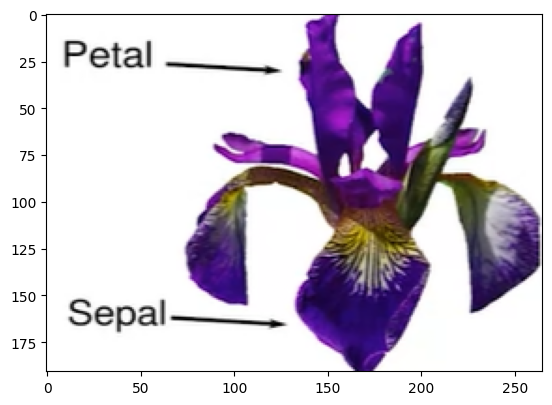

In [8]:
im = plt.imread('./parts_iris_flower.png')
plt.imshow(im)

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
df = pd.read_csv('iris.csv', header=None)

In [18]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [20]:
df.columns = ['comprim_sepala',
              'largura_sepala',
              'comprim_petala',
              'largura_petala',
              'classe']
df

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [21]:
df.head()

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [23]:
df.head(10)

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [24]:
df.tail()

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [25]:
df.tail(8)

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
142,5.8,2.7,5.1,1.9,Virginica
143,6.8,3.2,5.9,2.3,Virginica
144,6.7,3.3,5.7,2.5,Virginica
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [26]:
df.iloc[0]

comprim_sepala       5.1
largura_sepala       3.5
comprim_petala       1.4
largura_petala       0.2
classe            Setosa
Name: 0, dtype: object

In [27]:
df.iloc[5]

comprim_sepala       5.4
largura_sepala       3.9
comprim_petala       1.7
largura_petala       0.4
classe            Setosa
Name: 5, dtype: object

In [30]:
df.iloc[[0, 5]]

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa


In [31]:
ind_list = [0, 1, 2, 3, 4, 5, 50, 51, 52, 53, 54, 55, 100, 101, 102, 103]
df.loc[ind_list]


,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor


In [32]:
df["comprim_sepala"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: comprim_sepala, Length: 150, dtype: float64

In [33]:
df["comprim_sepala"].iloc[149]

np.float64(5.9)

In [34]:
df["comprim_sepala"].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: comprim_sepala, dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   comprim_sepala  150 non-null    float64
 1   largura_sepala  150 non-null    float64
 2   comprim_petala  150 non-null    float64
 3   largura_petala  150 non-null    float64
 4   classe          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
df.shape

(150, 5)

In [38]:
df[["largura_sepala","largura_petala","comprim_petala"]]

,largura_sepala,largura_petala,comprim_petala
0,3.5,0.2,1.4
1,3.0,0.2,1.4
2,3.2,0.2,1.3
3,3.1,0.2,1.5
4,3.6,0.2,1.4
...,...,...,...
145,3.0,2.3,5.2
146,2.5,1.9,5.0
147,3.0,2.0,5.2
148,3.4,2.3,5.4


In [39]:
df['classe'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

<Axes: >

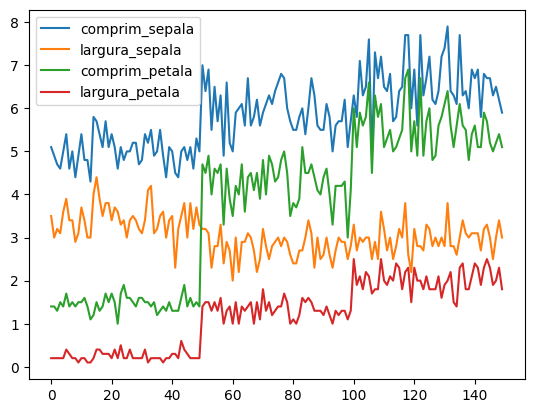

In [40]:
df.plot()

<Axes: >

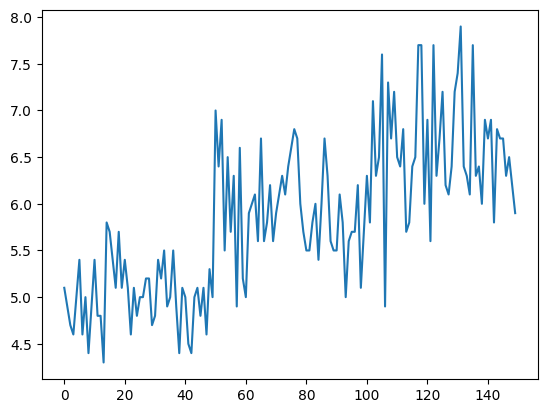

In [41]:
df['comprim_sepala'].plot()

<Axes: ylabel='Frequency'>

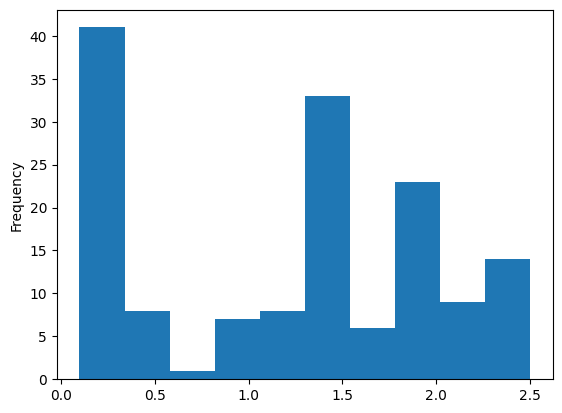

In [42]:
df['largura_petala'].plot(kind='hist')

In [43]:
df['largura_petala'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [44]:
df[df['largura_petala'] == 1.1]

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
69,5.6,2.5,3.9,1.1,Versicolor
80,5.5,2.4,3.8,1.1,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor


In [45]:
df.query('largura_petala == 1.1')

,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
69,5.6,2.5,3.9,1.1,Versicolor
80,5.5,2.4,3.8,1.1,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor


In [46]:
df[(df['largura_petala'] > 1.1) & (df['largura_petala'] < 4.4)]


,comprim_sepala,largura_sepala,comprim_petala,largura_petala,classe
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [47]:
df.describe()

,comprim_sepala,largura_sepala,comprim_petala,largura_petala
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


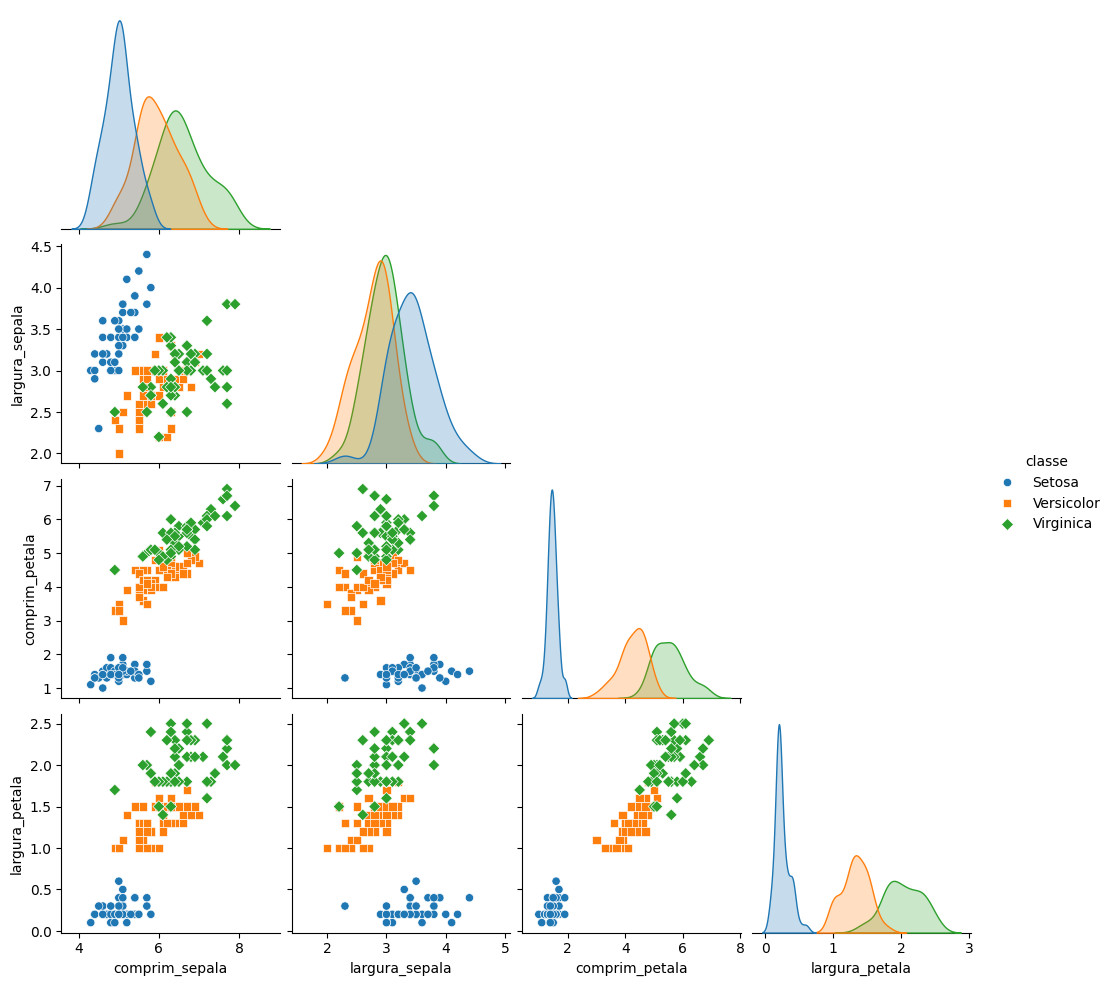

In [48]:
sns.pairplot(df, hue='classe', markers=['o', 's', 'D'], corner=True)
